# Build Random Wedge Sampler Transform

In [3]:
# use autoreload
%load_ext autoreload
%autoreload 2

import yaml
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch
from torch.utils.data import DataLoader

# import lightning trainer
import lightning as L
from lightning.pytorch.loggers import WandbLogger

# imports
from jepa.modules.tasks import ClassifyPt

from toytrack.dataloaders import TracksDataset
from jepa.utils import WedgePatchify, QualityCut

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Wedgify Transform

In [ ]:
config = yaml.load(open('configs/13_testing.yaml'), Loader=yaml.FullLoader)

[autoreload of jepa.modules.models.jepa failed: Traceback (most recent call last):
  File "/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/global/cfs/cdirs/m3443/usr/dtmurnane/Side_Work/Particle-JE

In [ ]:
patchify = WedgePatchify(phi_range=np.pi / 4, radius_midpoint = (config["dataset_args"]["detector"]["max_radius"] + config["dataset_args"]["detector"]["min_radius"]) / 2)

dataset = TracksDataset(config["dataset_args"], transform=patchify)
dataloader = DataLoader(dataset, batch_size=3, num_workers=0, collate_fn=dataset.collate_fn)

Selected phi: 0.8861
Phi range: [0.4934, 1.2788]
Hits in phi mask: 6
Hits in inner mask: 28
Hits in outer mask: 28
Hits in context mask: 2
Hits in target mask: 4


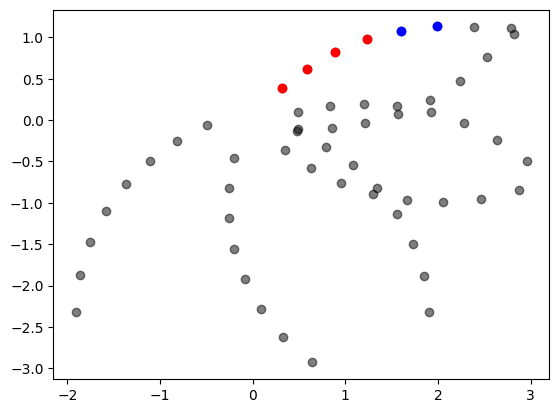

In [ ]:
for sample in dataset:
    inner_x = sample["x"][sample["context_mask"]]
    outer_x = sample["x"][sample["target_mask"]]

    plt.scatter(sample["x"][:, 0], sample["x"][:, 1], color="black", alpha=0.5)
    plt.scatter(inner_x[:, 0], inner_x[:, 1], color="blue")
    plt.scatter(outer_x[:, 0], outer_x[:, 1], color="red")
    plt.show()
    break

In [ ]:
for sample in dataloader:
    print(sample)
    break

Selected phi: -2.4528
Phi range: [-2.8455, -2.0601]
Hits in phi mask: 15
Hits in inner mask: 36
Hits in outer mask: 36
Hits in context mask: 8
Hits in target mask: 7
Selected phi: -2.1321
Phi range: [-2.5248, -1.7394]
Hits in phi mask: 14
Hits in inner mask: 20
Hits in outer mask: 20
Hits in context mask: 8
Hits in target mask: 6
Selected phi: -3.0843
Phi range: [-3.4770, -2.6916]
Hits in phi mask: 5
Hits in inner mask: 32
Hits in outer mask: 32
Hits in context mask: 3
Hits in target mask: 2
{'x': tensor([[[ 0.1405, -0.4798],
         [ 0.2518, -0.8193],
         [ 0.4103, -1.1429],
         [ 0.6159, -1.4457],
         [ 0.8682, -1.7221],
         [ 1.1668, -1.9655],
         [ 1.5113, -2.1681],
         [ 1.9011, -2.3207],
         [ 0.3913,  0.3112],
         [ 0.5930,  0.6189],
         [ 0.7500,  0.9550],
         [ 0.8583,  1.3163],
         [ 0.9132,  1.6986],
         [ 0.9093,  2.0970],
         [ 0.8401,  2.5058],
         [ 0.6974,  2.9178],
         [-0.0633,  0.4960],
    

## Data Quality Transform

In [4]:
config = yaml.load(open('configs/13_testing.yaml'), Loader=yaml.FullLoader)

In [12]:
patchify = WedgePatchify(phi_range=np.pi / 4, radius_midpoint = (config["dataset_args"]["detector"]["max_radius"] + config["dataset_args"]["detector"]["min_radius"]) / 2)
quality_cut = QualityCut(min_hits=config["min_hits"], pt_threshold=config["pt_threshold"])

dataset = TracksDataset(config["dataset_args"], transforms=[patchify, quality_cut])
dataloader = DataLoader(dataset, batch_size=10, num_workers=0, collate_fn=dataset.collate_fn)
model = ClassifyPt(**config)

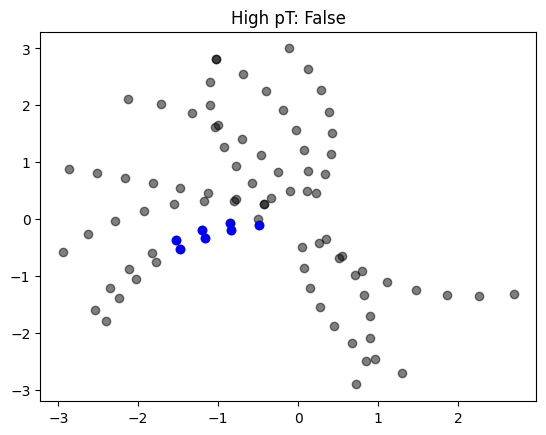

In [13]:
for sample in dataset:
    inner_x = sample["x"][sample["context_mask"]]

    plt.scatter(sample["x"][:, 0], sample["x"][:, 1], color="black", alpha=0.5)
    plt.scatter(inner_x[:, 0], inner_x[:, 1], color="blue")
    plt.title(f"High pT: {sample['y'].item()}")
    plt.show()
    break

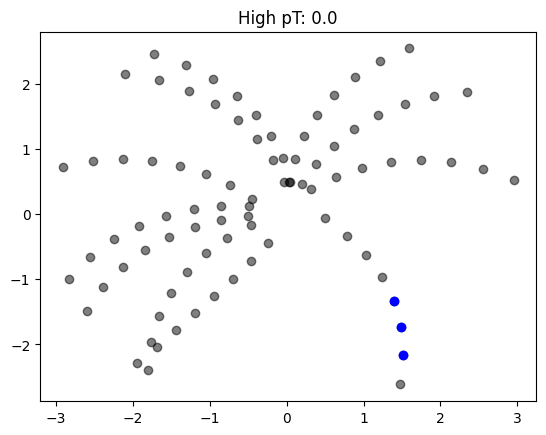

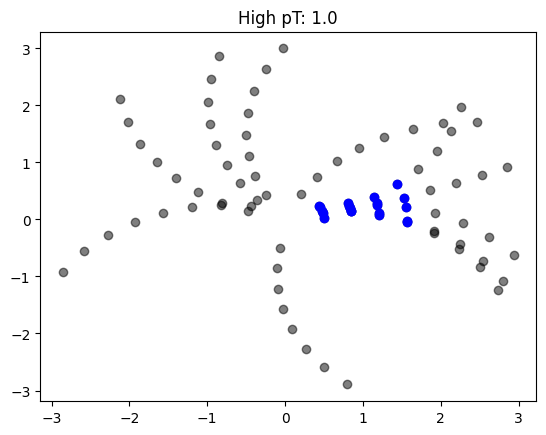

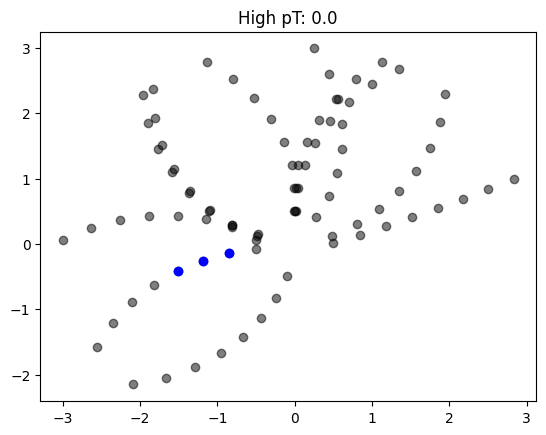

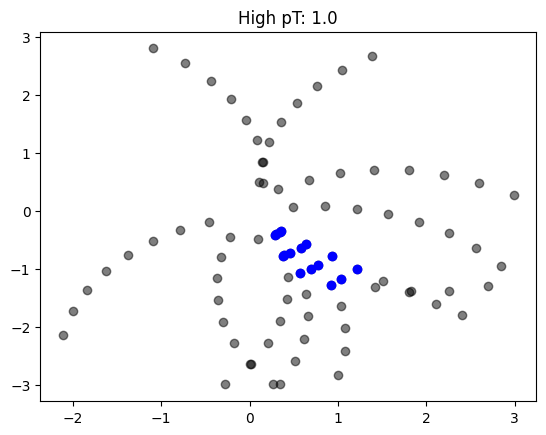

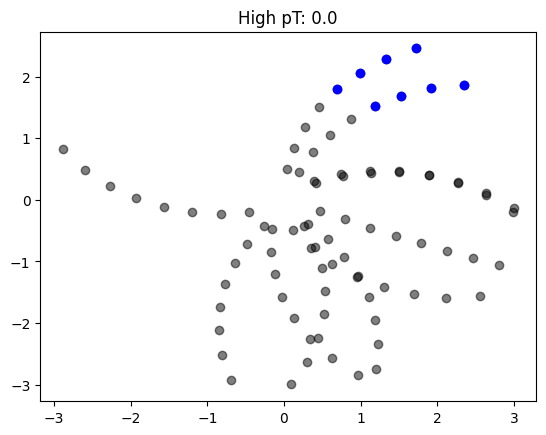

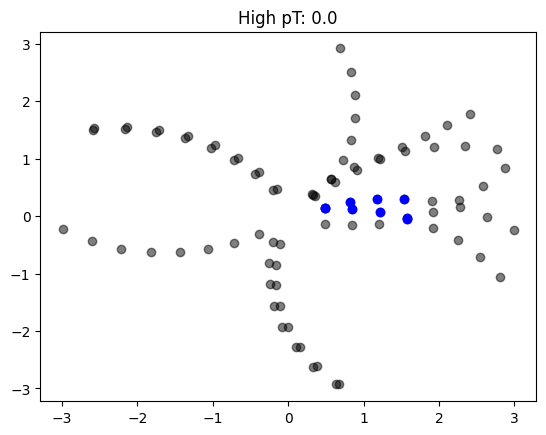

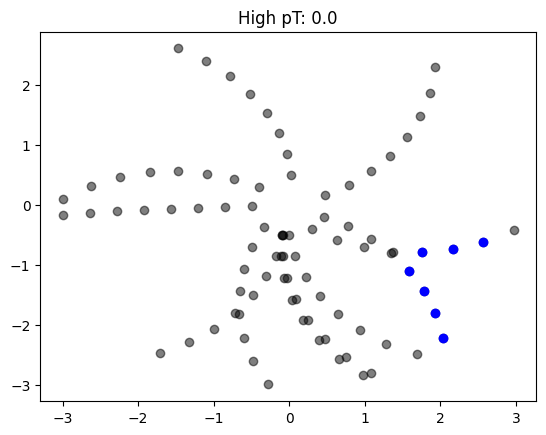

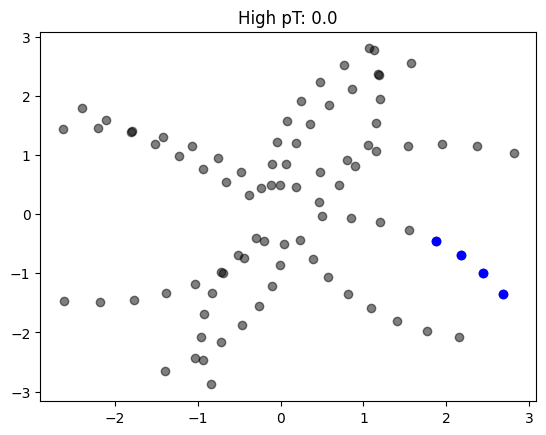

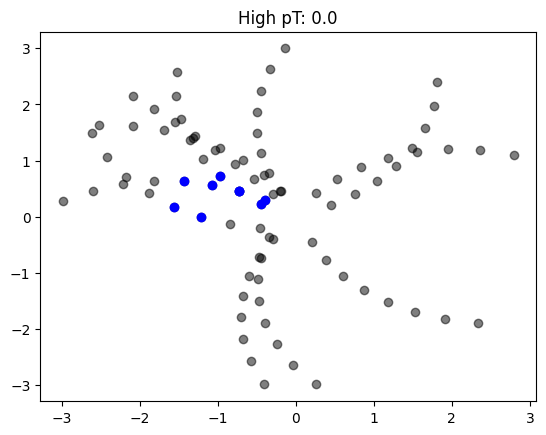

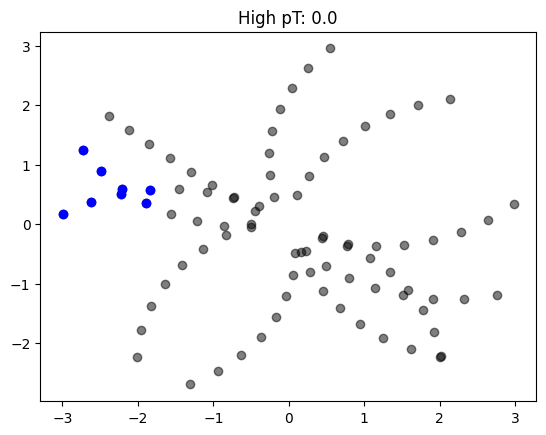

In [17]:
for batch in dataloader:
    x, mask, context_mask, y = model._extract_batch_data(batch)

    for i in range(10):
        plt.scatter(x[i, :, 0], x[i, :, 1], color="black", alpha=0.5)
        plt.scatter(x[i, context_mask[i], 0], x[i, context_mask[i], 1], color="blue")
        plt.title(f"High pT: {y[i].item()}")
        plt.show()

    break
    

In [9]:
x.shape

torch.Size([3, 88, 2])

## Explore Model Loading

In [2]:
with open("configs/13_testing.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [3]:
model = ClassifyPt(**config)


In [4]:
for batch in model.train_dataloader():
    print(batch)
    break


{'x': tensor([[[ 0.2386, -0.4394],
         [ 0.4088, -0.7534],
         [ 0.6231, -1.0422],
         ...,
         [-2.0617, -0.9869],
         [-2.4718, -0.9353],
         [-2.8885, -0.8103]],

        [[-0.3435, -0.3633],
         [-0.5672, -0.6427],
         [-0.7509, -0.9542],
         ...,
         [ 1.5106,  1.7154],
         [ 1.8899,  1.8474],
         [ 2.3047,  1.9206]],

        [[ 0.3936, -0.3083],
         [ 0.7597, -0.3969],
         [ 1.1356, -0.4300],
         ...,
         [ 0.8649, -2.1157],
         [ 0.7923, -2.5213],
         [ 0.6448, -2.9299]],

        ...,

        [[-0.4993,  0.0261],
         [-0.8512, -0.1010],
         [-1.1817, -0.2794],
         ...,
         [ 0.4226,  2.2463],
         [ 0.6911,  2.5509],
         [ 1.0217,  2.8206]],

        [[ 0.3062, -0.3953],
         [ 0.5982, -0.6139],
         [ 0.9213, -0.7911],
         ...,
         [-1.6507,  1.5811],
         [-1.7620,  1.9698],
         [-1.8123,  2.3908]],

        [[ 0.2468,  0.4348],
 

In [7]:
batch.keys()

dict_keys(['x', 'mask', 'pids', 'event', 'context_mask', 'target_mask', 'pt', 'y'])

In [10]:
for key in batch.keys():
    if isinstance(batch[key], torch.Tensor):
        print(f"{key}: {batch[key].shape}")

x: torch.Size([200, 88, 2])
mask: torch.Size([200, 88])
pids: torch.Size([200, 88])
context_mask: torch.Size([200, 88])
target_mask: torch.Size([200, 88])
pt: torch.Size([200, 88])
y: torch.Size([200])


## Train Run

In [3]:
with open("configs/13_testing.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [4]:
model = ClassifyPt(**config)

In [5]:
wandb_logger = WandbLogger(project="JEPA_toytrack_classifyPt")
trainer = L.Trainer(
    max_epochs=10, 
    devices=1, 
    accelerator="gpu", 
    limit_train_batches = config["train_batches"], 
    limit_val_batches = config["val_batches"],
    logger = wandb_logger,
)
trainer.fit(model=model)

/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /global/homes/d/danieltm/.conda/envs/jepa/lib/python ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type           | Params
---------------------------------------------------
0 | encoder         | Encoder        | 73.3 K
1 | ema_encoder     | Encoder        | 73.3 K
2 | predictor       | Sequential     | 18.7 K
3 | prediction_head | Sequential     | 17.8 K
4 | train_accuracy  | BinaryAccuracy | 0     
5 | val_accuracy    | BinaryAccuracy | 0     
6 | val_auroc       | BinaryAUROC    | 0     
---------------------------------------------------
109 K     Trainable params
73.3 K    Non-trainable params
183 K     Total params
0.733     Total estimated model params size (MB)


/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/site-packages/lightning/pytorch/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 200. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 9: 100%|██████████| 100/100 [00:28<00:00,  3.54it/s, v_num=4df9]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 100/100 [00:28<00:00,  3.54it/s, v_num=4df9]
